# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [2]:
df= pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.shape

(6819, 96)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
#check class frequency
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

# correlation matrix

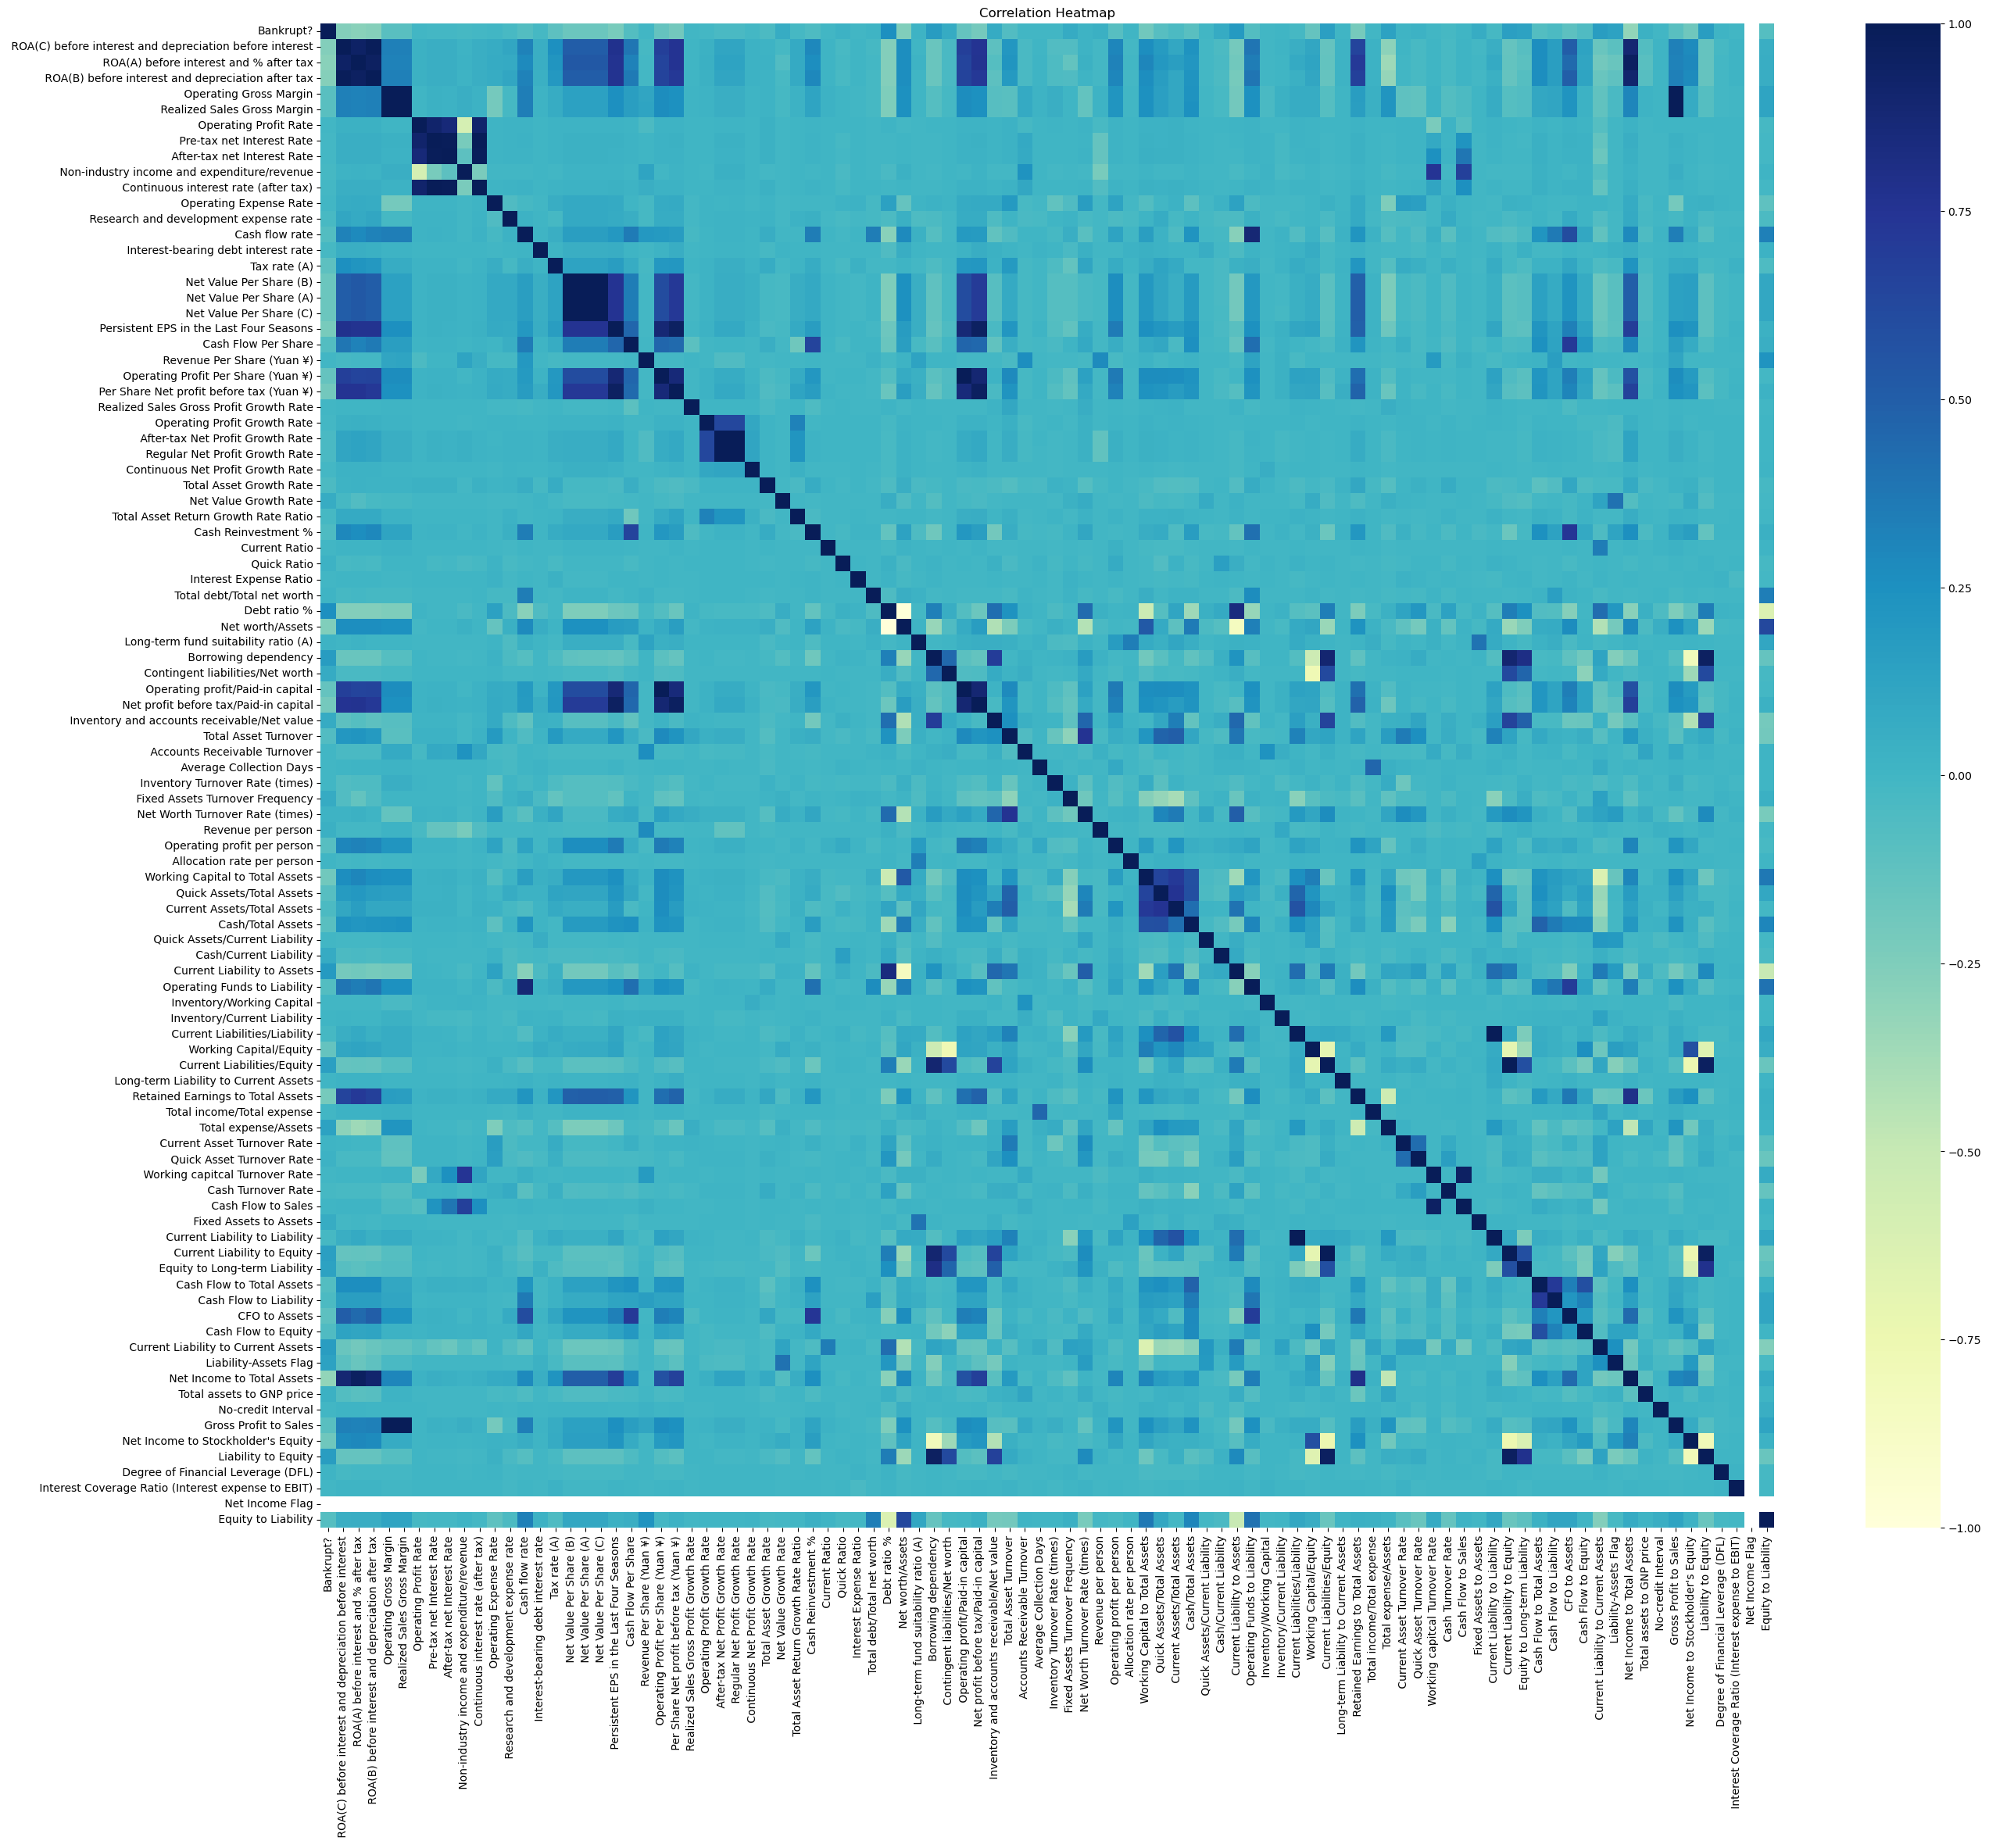

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Set the figure size
plt.figure(figsize=(30,25))
# Generate a heatmap with a different color map
sns.heatmap(corr_matrix, cmap='YlGnBu')  # You can try other color maps like 'viridis', 'plasma', 'inferno', etc.
# Add a title
plt.title("Correlation Heatmap")
# Show the plot
plt.show()


In [10]:
#set benchmark for features correlation significance w target
corr_features= corr_matrix['Bankrupt?'].abs() >=0.15
corr_features.value_counts()

Bankrupt?
False    74
True     22
Name: count, dtype: int64

In [11]:
#get list of names for features passing the benchmark
features_name= list(corr_features[corr_features].index)
features_name

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Working Capital to Total Assets',
 ' Current Liability to Assets',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Current Liability to Equity',
 ' Current Liability to Current Assets',
 ' Net Income to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity']

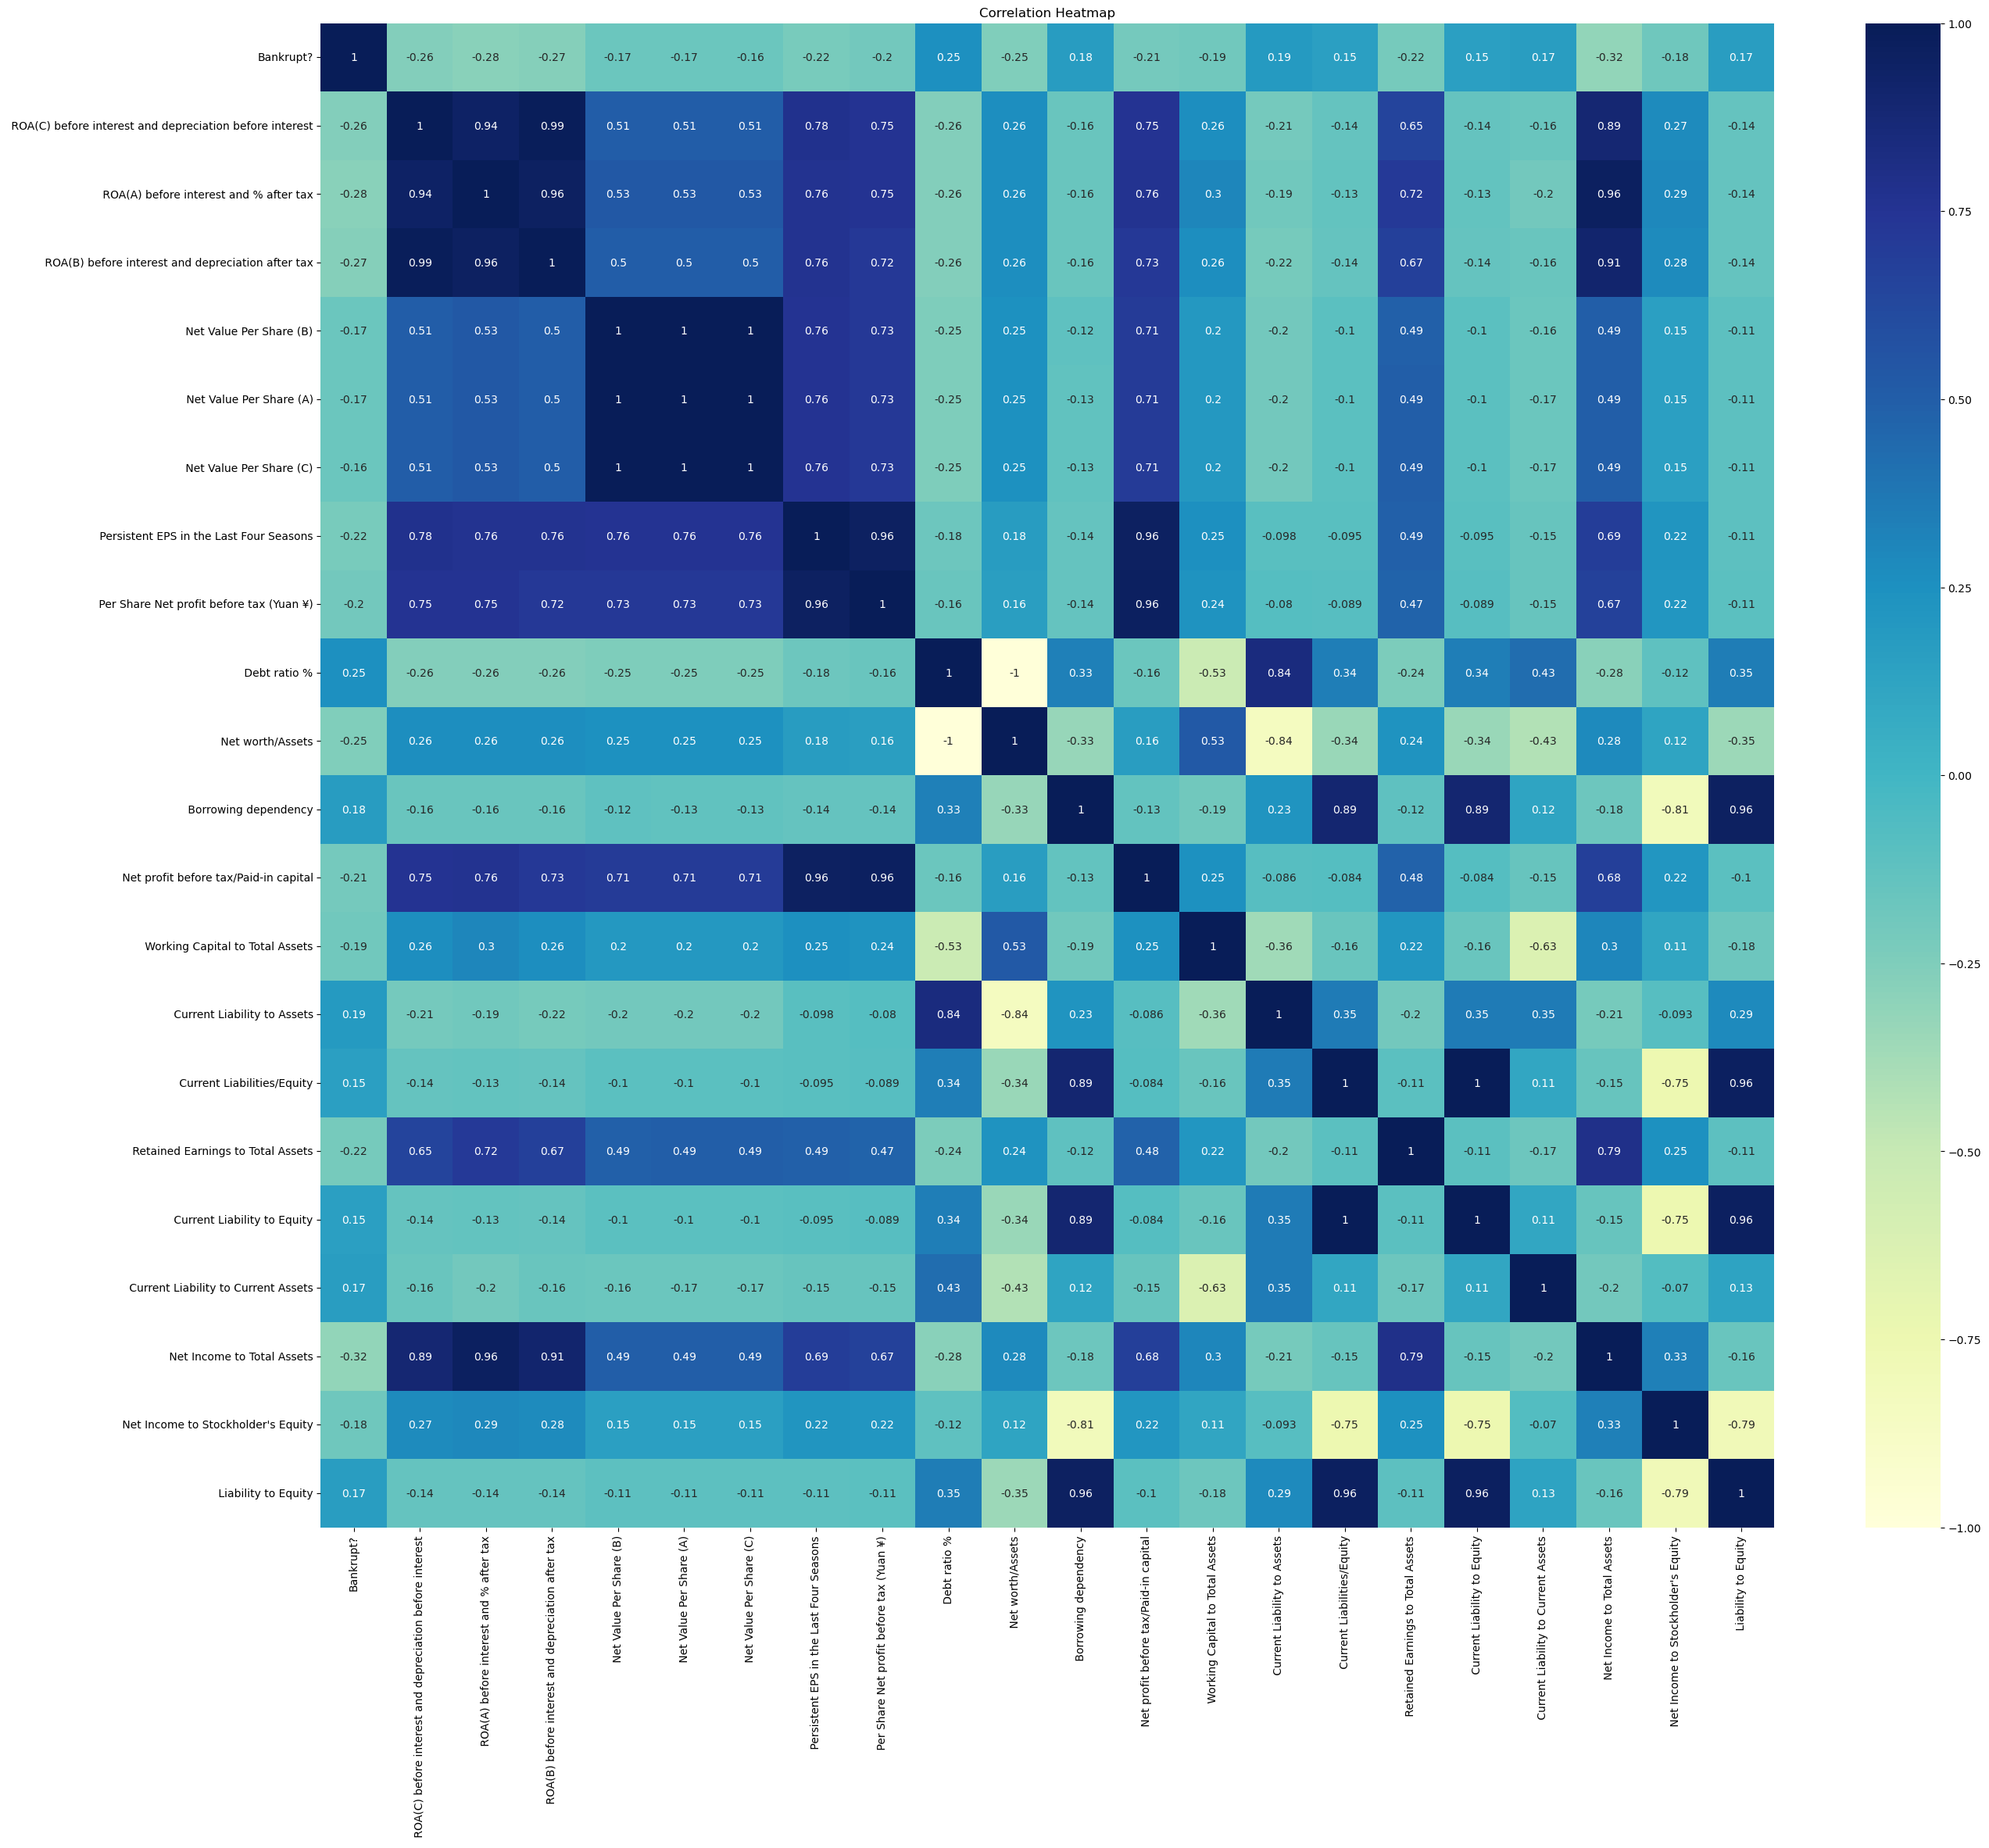

In [12]:
mini_corr_matrix= df[features_name].corr()

plt.figure(figsize=(30,25))
sns.heatmap(mini_corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

# Outliers Removal

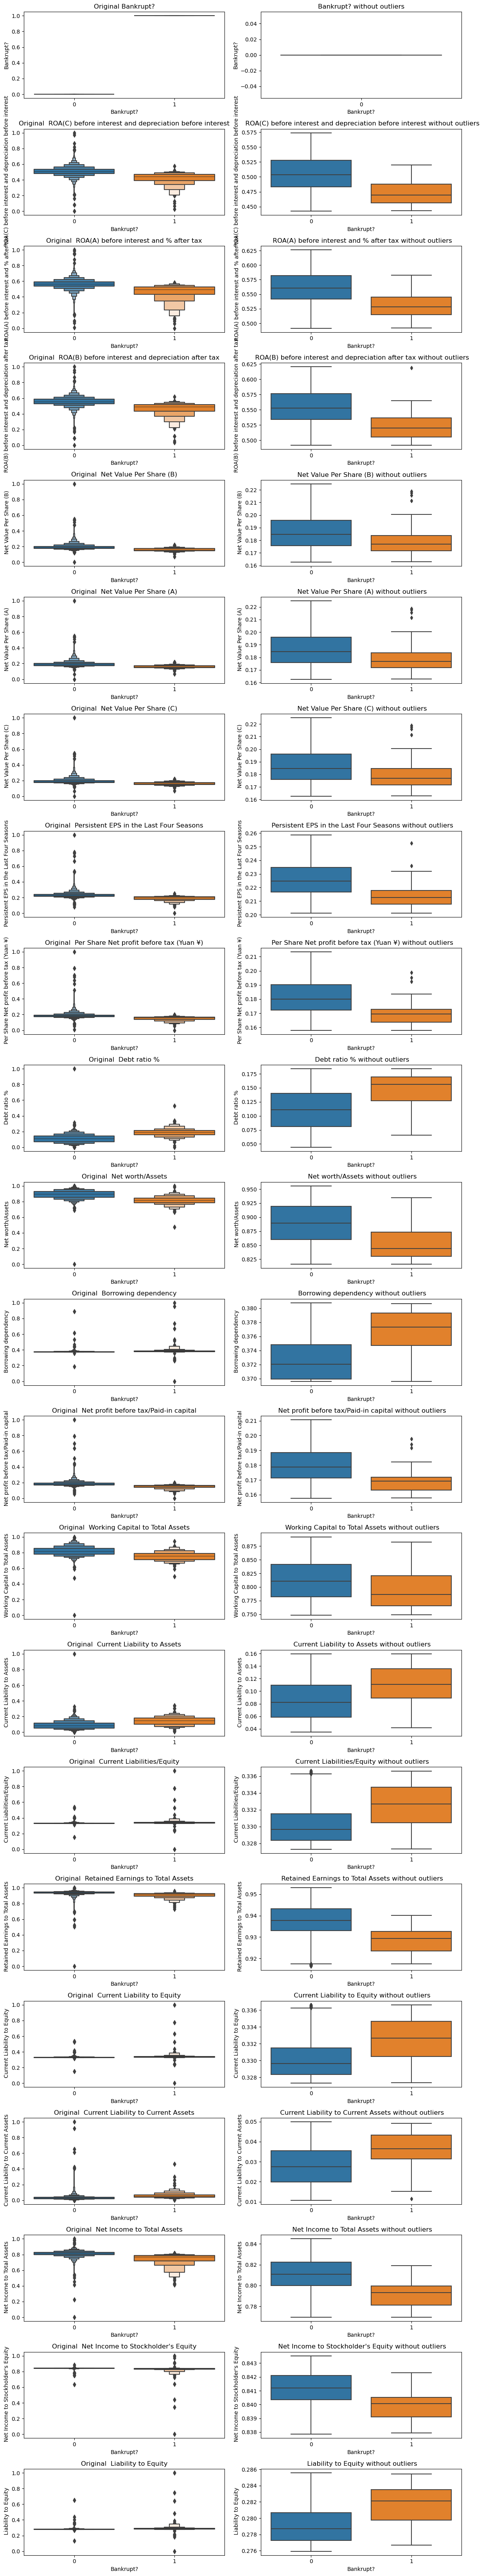

In [13]:
fig, axes= plt.subplots(len(features_name), 2, figsize=(12, len(features_name)*3))

for i, feature in enumerate(features_name):
    sns.boxenplot(x='Bankrupt?', y=feature, data=df, ax=axes[i,0])
    axes[i,0].set_title(f'Original {feature}')
    
    q1,q9 = df[feature].quantile([0.1,0.9])
    mask= df[feature].between(q1,q9)
    sns.boxplot(x='Bankrupt?',y=feature, data=df[mask], ax=axes[i,1])
    axes[i,1].set_title(f'{feature} without outliers')
    
plt.tight_layout()
plt.show()

# Random Forest Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [15]:
X= df.drop(columns='Bankrupt?')
y=df['Bankrupt?']

X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.82      0.18      0.29        51

    accuracy                           0.97      1364
   macro avg       0.89      0.59      0.64      1364
weighted avg       0.96      0.97      0.96      1364



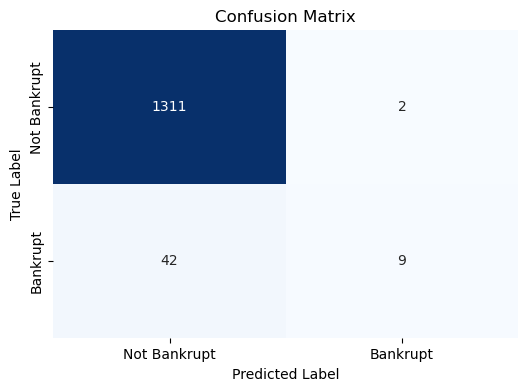

In [17]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Bankrupt', 'Bankrupt'], 
            yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



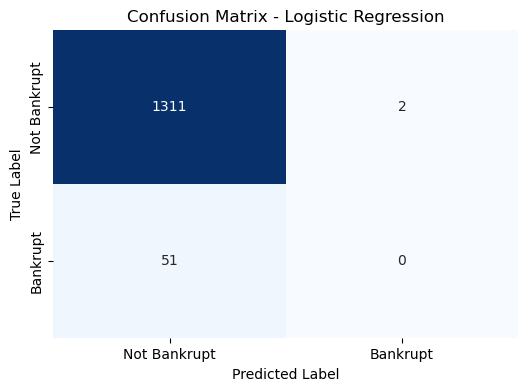

In [19]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Bankrupt', 'Bankrupt'], 
            yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# K Neighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN model (with k=5 neighbors by default)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.33      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.65      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364



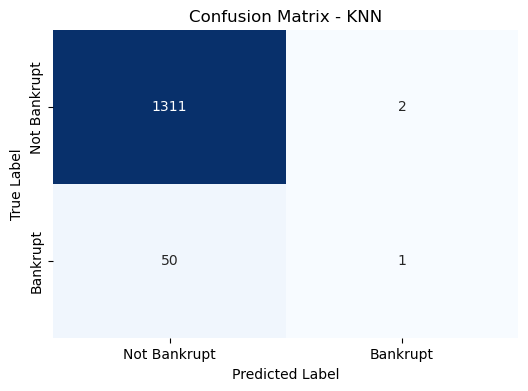

In [21]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Bankrupt', 'Bankrupt'], 
            yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Neural Network model

In [22]:
from sklearn.neural_network import MLPClassifier
# Initialize the Neural Network model (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1313
           1       0.21      0.12      0.15        51

    accuracy                           0.95      1364
   macro avg       0.59      0.55      0.56      1364
weighted avg       0.94      0.95      0.94      1364



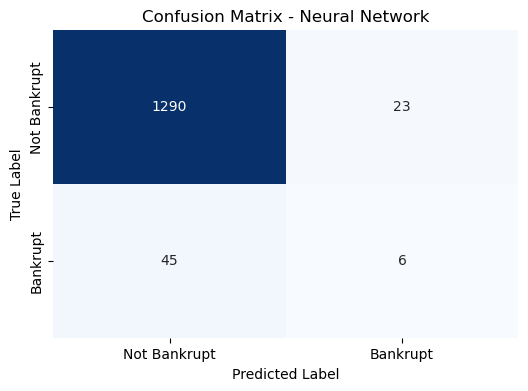

In [23]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Bankrupt', 'Bankrupt'], 
            yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC for All Models

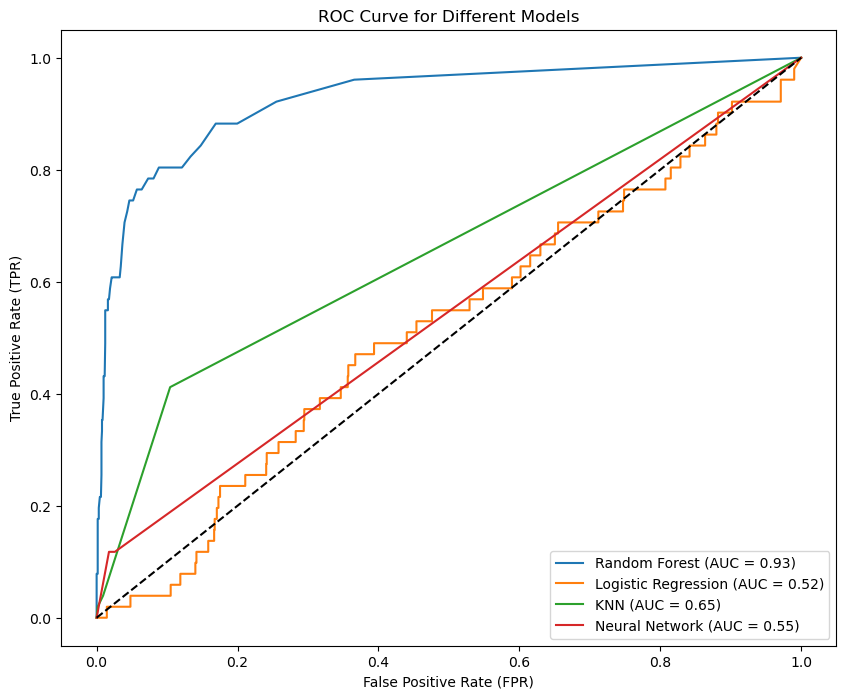

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict the probabilities for ROC curve (probability of the positive class)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
mlp_probs = mlp_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

rf_auc = auc(rf_fpr, rf_tpr)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
mlp_auc = auc(mlp_fpr, mlp_tpr)

# Plot ROC curve for each model
plt.figure(figsize=(10,8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, label=f'Neural Network (AUC = {mlp_auc:.2f})')

# Plot random chance line (50% line)
plt.plot([0, 1], [0, 1], 'k--')

# Labels and title
plt.title('ROC Curve for Different Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')

# Show the plot
plt.show()


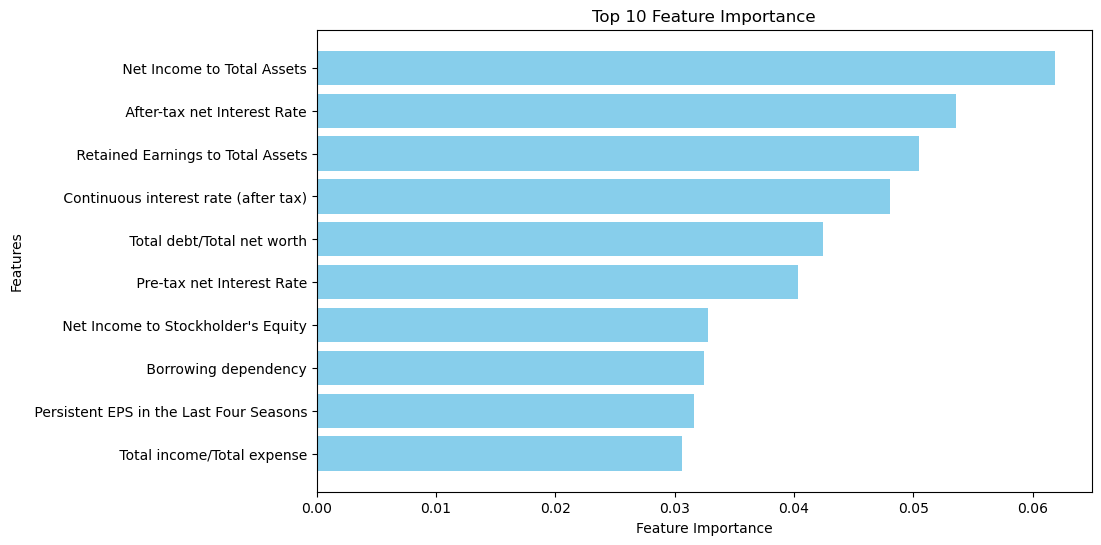

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train RandomForestClassifier on the SMOTE-balanced data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Feature importance plot as before
importance = rf_model_smote.feature_importances_
feature_importance_df = pd.DataFrame({'Features': X_train.columns, 'Importance': importance})
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Features'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()
